In [1]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import histogram
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF
import pylab as pl
import math

In [2]:
# Load the dataset
materna = pd.read_csv('mortalidad_materna.csv')
#materna.info()

## Question 3: How many instances of adolescent maternal mortality are within Mexico? How does this compare to the total instances of maternal mortality? 
- The World Health Organization (WHO) states that an upwards of 13 million adolescent girls (ages under 20) give birth every year, and complications from those pregnancies and childbirth are a leading cause of death for those young mothers. 

#### Step 1: Create Clean Sub-Dataframe for Analysis

In [8]:
# Create variables for Last Recorded Age from materna
last_age = materna['Edad cumplida']

# Create variable for Birth and Reason for Mortality in order to remove non-maternal deaths from subset
birth = materna['Año de nacimiento']
mortality_reason = materna['Razón de mortalidad materna']

# Create a subdataset with Region and Last Recorded Age from materna
mortality_ages = pd.concat([last_age, birth, mortality_reason], axis=1)
mortality_ages.columns = ['Age of Maternal Mortality', 'Year of Birth', 'Mortality Reason']
mortality_ages = mortality_ages.sort_values(by=['Age of Maternal Mortality'],ascending=False)
mortality_ages.head()

,Age of Maternal Mortality,Year of Birth,Mortality Reason
16080,998,0,1
17886,998,0,0
13358,998,0,1
17887,998,0,0
14622,998,0,1


##### Remove Irregular Values
- Case 1: Remove all rows with '0' in the 'Year of Birth' column.
- Case 2: Remove all rows with '0' in the 'Mortality Reason' column.

In [9]:
#Remove rows with 0 values in Year of Birth
mortality_ages = mortality_ages[mortality_ages['Year of Birth'] != 0]

#Remove rows with 0 values in Mortality Reason
mortality_ages = mortality_ages[mortality_ages['Mortality Reason'] != 0 ]
mortality_ages.head()

,Age of Maternal Mortality,Year of Birth,Mortality Reason
14960,54,1942,1
9964,53,1961,1
7705,53,1963,1
16722,51,1960,1
15461,50,1960,1


In [10]:
mortality_ages.tail()

,Age of Maternal Mortality,Year of Birth,Mortality Reason
1266,12,1993,1
6969,12,1988,1
10539,12,1999,1
9084,12,2001,1
9598,11,1998,1


In [15]:
adolescent_matern_mortality = mortality_ages[mortality_ages['Age of Maternal Mortality'] <= 20 ]
adolescent_matern_mortality.head()

,Age of Maternal Mortality,Year of Birth,Mortality Reason
11368,20,1985,1
16307,20,1990,1
15514,20,1986,1
11409,20,1996,1
8123,20,1990,1


#### Plot Sample Adolescent Age of Maternal Death Distribution

In [19]:
# Create a variable for adolescent_ages_maternal_mortality
adolescent_ages_maternal_mortality = adolescent_matern_mortality['Age of Maternal Mortality']

# Create a variable for adolsecent_sample_size
adolsecent_sample_size = len(adolescent_ages_maternal_mortality)

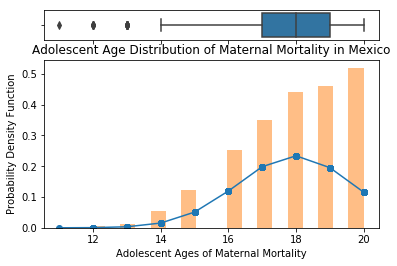

'The sample(n=2886) population mean age of adolescent maternal mortality is 17.98 years old with a standard deviation of 1.71.'

In [23]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(adolescent_ages_maternal_mortality, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(adolescent_ages_maternal_mortality, np.mean(adolescent_ages_maternal_mortality), np.std(adolescent_ages_maternal_mortality))
pl.plot(adolescent_ages_maternal_mortality, fit, '-o')
pl.hist(adolescent_ages_maternal_mortality, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Adolescent Ages of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Adolescent Age Distribution of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(adolsecent_sample_size) + ') population mean age of adolescent maternal mortality is ' + str(round(np.mean(adolescent_ages_maternal_mortality), 2)) + ' years old with a standard deviation of ' + str(round(np.std(adolescent_ages_maternal_mortality), 2)) + '.'


*Preliminary* **Conclusion**: The distribution appears to have a skewed-right distributed based off of the histogram and boxplot of instance of adolescent maternal mortality. Since binning bias can occur, the Cumulative Distribution Function (CDF) needs to be analyzed. Based off of the Central Limit Theorem (CLT), the sampling distribution of the sample means approaches a normal distribution as the sample size (n) gets larger - regardless of what the shape of the population distribution. Under this theorem,  n>30  is considered a large sample size. Since the current database sample size n=2886, CLT can still be assumed despite the skewed presentation of the data.